<table>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/kdiamantaras2.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
<td>
<p>Konstantinos Diamantaras</p>
<p>Department of Information and Electronic Engineering</p>  
<p>International Hellenic University</p>  
<p>Greece</p>
</td>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/International_Hellenic_University_logo.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
</table>

# Scikit-learn demo  
<ul>
<li> Use models: <code>GaussianNB</code>, <code>PCA</code>, Cross-validation method: <code>train_test_split</code>
<li> Build and train the model</li>
<li> Use PCA as preprocessing</li>
<li> Dataset: <a href="https://people.iee.ihu.gr/~kdiamant/mnist_49.npz">MNIST_4_vs_9</a></li>
</ul>

In [0]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data

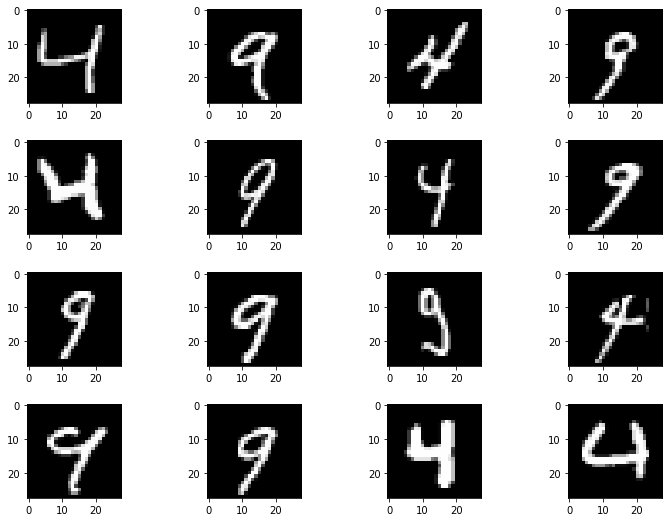

In [0]:
data = np.load('mnist_49.npz')
x = data['x']
t = data['t']
plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(16):
    axes = plt.subplot(4,4,i+1)
    plt.imshow(np.reshape(x[i],[28,28]), cmap=plt.gray())

Train the Gaussian Naive Bayes model [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) without preprocessing of the data  
Use Cross-Validation with the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method.

In [0]:
acc_train = np.array(10*[0.0])
acc_test = np.array(10*[0.0])
for fold in range(10):
    xtrain, xtest, ttrain, ttest = train_test_split(x, t, test_size=0.3)
    model = GaussianNB()
    model.fit(xtrain,ttrain)
    acc_train[fold] = model.score(xtrain,ttrain)
    acc_test[fold] = model.score(xtest,ttest)
acc_train_mean = np.mean(acc_train)
acc_test_mean = np.mean(acc_test)
print('Mean Train Accuracy {0}'.format(acc_train_mean))
print('Mean Test Accuracy {0}'.format(acc_test_mean))

Mean Train Accuracy 0.7339876408578699
Mean Test Accuracy 0.7283493499152063


Use Principal Component Analysis [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to compress the input images.  
Then use the Gaussian Naive Bayes calssifier on the compressed images.  
Try various numbers of PCA components 

In [0]:
num_components_list = [1,2,5,10,20,30,40,50,100,200]
accuracy_train = np.array(len(num_components_list)*[0.0])
accuracy_test = np.array(len(num_components_list)*[0.0])
i=0
for num_components in num_components_list:
    print('*** Number of PCA components={0}'.format(num_components))
    pca = PCA(n_components = num_components)
    x_pca = pca.fit_transform(x)
    '''
    K-fold CV
    '''
    acc_train = np.array(10*[0.0])
    acc_test = np.array(10*[0.0])
    for fold in range(10):
        xtrain, xtest, ttrain, ttest = train_test_split(x_pca, t, test_size=0.3)
        model = GaussianNB()
        model.fit(xtrain,ttrain)
        acc_train[fold] = model.score(xtrain,ttrain)
        acc_test[fold] = model.score(xtest,ttest)
    accuracy_train[i] = np.mean(acc_train)
    accuracy_test[i] = np.mean(acc_test)
    print('Mean accuracy (train) = {0}, Mean Accuracy (test) = {1}'.format(
            accuracy_train[i], accuracy_test[i]))
    i += 1

*** Number of PCA components=1
Mean accuracy (train) = 0.577923179449897, Mean Accuracy (test) = 0.5771905031091011
*** Number of PCA components=2
Mean accuracy (train) = 0.6592027141645462, Mean Accuracy (test) = 0.65895986433013
*** Number of PCA components=5
Mean accuracy (train) = 0.8051254089422029, Mean Accuracy (test) = 0.803024307518372
*** Number of PCA components=10
Mean accuracy (train) = 0.9173270325942081, Mean Accuracy (test) = 0.9159694742792539
*** Number of PCA components=20
Mean accuracy (train) = 0.9340724584999393, Mean Accuracy (test) = 0.9330412662521198
*** Number of PCA components=30
Mean accuracy (train) = 0.9339149400218103, Mean Accuracy (test) = 0.9326455624646695
*** Number of PCA components=40
Mean accuracy (train) = 0.9315279292378529, Mean Accuracy (test) = 0.9304691916336914
*** Number of PCA components=50
Mean accuracy (train) = 0.9304980007270085, Mean Accuracy (test) = 0.9274448841153193
*** Number of PCA components=100
Mean accuracy (train) = 0.8643

Plot results

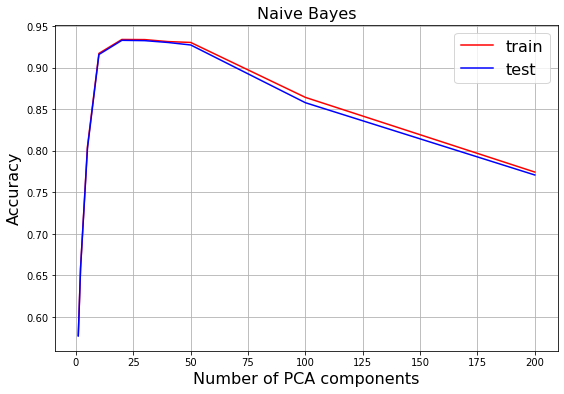

In [0]:
fig, ax = plt.subplots(figsize=(9,6))
fig.set_facecolor('white')
plt.plot(num_components_list, accuracy_train, 'r')
plt.plot(num_components_list, accuracy_test, 'b')
plt.title('Naive Bayes', fontsize=16)
plt.xlabel('Number of PCA components', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(('train','test'), fontsize=16)
plt.grid(b=True)